<a href="https://colab.research.google.com/github/maperezp/Proyecto-CDA/blob/main/src%20/ModelosClasificacionInfeccionPostTx.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
### Importación de librerias
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score

# graficas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


#Carga de datos


In [18]:
#data= pd.read_excel("/content/Base_infecciones_POPTH_limpia.xlsx")
data= pd.read_excel("/content/Base_infecciones_POPTH_nuevo_modelado.xlsx")
codificacion= pd.read_excel("/content/codificación.xlsx")

In [ ]:
codificacion

,Variable,Descripción,Tipo de Variable,Valores
0,#Paciente_Tx,Número de paciente,Númerica Discreta,NaN
1,Año_Tx,Año del trasplante,Númerica Discreta,NaN
2,Fecha_Tx,Tiempo transcurrido desde el trasplante hepático,Fecha,NaN
3,Código anonimizado,Código anonimizado para tratamiento de datos d...,Texto,NaN
4,Edad,Tiempo transcurrido a partir del nacimiento de...,Númerica Discreta,NaN
5,Sexo,"Condición orgánica, masculina o femenina",Categórica,"1': 'M', '2': 'F'"
6,Etiología_#1,Enfermedad que lo llevó a la enfermedad hepática,Categórica,"""0"":""NINGUNA"",\n ""1"":""HCV"",\n ""2"":""HBV"",\n ""3..."
7,Etiología_#2,Enfermedad que lo llevó a la enfermedad hepática,Categórica,"""0"":""NINGUNA"",\n ""1"":""HCV"",\n ""2"":""HBV"",\n ""3..."
8,Child_Pugh_Score,Child_Pugh_Score,Númerica Discreta,NaN
9,Meld_Score,Meld_Score,Númerica Discreta,NaN


In [4]:
data.shape

(557, 62)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Código anonimizado                          557 non-null    object        
 1   #Paciente_Tx                                557 non-null    int64         
 2   Etiología_#1                                557 non-null    object        
 3   Etiología_#2                                557 non-null    object        
 4   Edad                                        557 non-null    int64         
 5   Sexo                                        557 non-null    object        
 6   Child_Pugh_Score_Cat                        158 non-null    object        
 7   Child_Pugh_Score                            557 non-null    int64         
 8   Meld_Score                                  557 non-null    int64         
 9   Diabetes_M

Revisión de variables categoricas para analizar si es necesario transformarlas.

In [19]:
data["Child_Pugh_Score_Cat"].value_counts()

,count
Child_Pugh_Score_Cat,
B,86
C,53
A,19


Esta variable nos permite identificar el grupo al que pertenece un valor de la variable Child_Pugh_Score, ya que existen rangos asociados al resultado de esta variable (prueba clínica). En primera instancia, dado que ambas variables están relacionadas, experimentaremos si existe diferenciación en el modelo al tener la variable categórica transformada con Ordinal Enconding, ya que existen relaciones de orden entre las categorías, o si los patrones se logran identificar únicamente con la variable numérica Child_Pugh_Score.

In [20]:
label_encoder = LabelEncoder()
data['Child_Pugh_Score_Label'] = label_encoder.fit_transform(data['Child_Pugh_Score_Cat'])


La otra variable categórica encontrada refiere al código de anonimización de los pacientes, lo cual será descartada del dataset para el desarrollo del modelo.

Ahora, dado que la base de datos se encuentra con información faltante y no es posible imputarla dato que refiere a información sensible y específica de los pacientes, buscaremos descartar las variables con mayor cantidad de valor faltantes y reducir el dataset para que no existan valores nulos y se pueda utilizar el algoritmo de K-means.

In [107]:
data_modelo= data.drop(columns=["Child_Pugh_Score_Cat", "Código anonimizado", "#Paciente_Tx","Child_Pugh_Score_Label"])

Es importante tener en cuenta el Meld_Score porque es un prueba clínica que da información sobre la posibilidad de supervivencia de un paciente luego de una intervención hepática. Asimismo, es relevante conocer la información del tiempo de isquemia, ya sea frío o caliente, puesto que de este valor depende el exito de un transplante.

In [108]:
sin= data_modelo.dropna(subset=["Tiempo_Cx","Tipo_Reconstrucción_Biliar","Tiempo_Isquemia_Fria","Tiempo_Isquemia_caliente","Días_En_Hospitalización_Piso_Post_Tx","UCI_6_meses_Pre_Tx","Diabetes_Mellitus","Meld_Score","Días_En_UCI_Post_Tx","Inmunosupresor_1_Postx","Inmunosupresor_2_6mesesPostTx","Días_En_UCI_Pre_Tx","Días_Totales_Intrahospitalarios_Post_Tx","Reintervención_Quirúrgica_hasta_1m_POP"])

In [109]:
sin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Etiología_#1                                557 non-null    object        
 1   Etiología_#2                                557 non-null    object        
 2   Edad                                        557 non-null    int64         
 3   Sexo                                        557 non-null    object        
 4   Child_Pugh_Score                            557 non-null    int64         
 5   Meld_Score                                  557 non-null    int64         
 6   Diabetes_Mellitus                           557 non-null    object        
 7   Tabaquismo                                  557 non-null    object        
 8   Alcoholismo                                 557 non-null    object        
 9   Hipertensi

Se eliminan las columnas tipo fecha y aquellas con datos faltantes.

In [110]:
#lista_nan=["Hipertensión_Arterial","IMC","Talla","Peso_previo_Cx","Child_Pugh_Score_Label","Child_Pugh_Score","Localización de la infección","Germen/Microorganismo aislado","Inmunosupresión_con_Anticuerpos","Localización de la infección","Tiempo_De_Dosis_Hasta_Tx#1", "Vivo_Hoy", "SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS"]
lista_nan=["Vivo_Hoy", "SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS","Fecha_Egreso_Hospitalario", "Fecha_Control/Muerte", "Fecha_Ingreso_Hospitalario", "Días_Totales_Intrahospitalarios_Pre_Tx", "Fecha_Tx", "Año_Tx"]

In [111]:
data_modelo=sin.drop(columns=lista_nan, errors = "ignore")

In [112]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 49 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Etiología_#1                                557 non-null    object 
 1   Etiología_#2                                557 non-null    object 
 2   Edad                                        557 non-null    int64  
 3   Sexo                                        557 non-null    object 
 4   Child_Pugh_Score                            557 non-null    int64  
 5   Meld_Score                                  557 non-null    int64  
 6   Diabetes_Mellitus                           557 non-null    object 
 7   Tabaquismo                                  557 non-null    object 
 8   Alcoholismo                                 557 non-null    object 
 9   Hipertensión_Arterial                       557 non-null    object 
 10  Peso_previo_Cx

Una vez hemos homogenizado la base de datos de los valores faltantes, podemos proceder a aplicar el pipeline que aplica el modelo.

Como nuestro objetivo es encontrar si existió infección post transplante (1 si sí, 0 de lo contrario), crearemos una nueva variable que condense esa información. Los parámetros para determinar el valor de esta nueva variable serán si alguno de los valores las variables que inician con "Inmunosupresor" contiene un valor distinto a -1.

In [113]:
inmuno_var= ["Inmunosupresor_2_PostTx",
"Inmunosupresor_1_1mesPostTx",
"Inmunosupresor_1_Postx",
"Inmunosupresor_2_PostTx_1mesPx",
"Inmunosupresor_1_6mesesPostx",
"Inmunosupresor_2_6mesesPostTx"]

In [114]:
data_modelo[inmuno_var]

,Inmunosupresor_2_PostTx,Inmunosupresor_1_1mesPostTx,Inmunosupresor_1_Postx,Inmunosupresor_2_PostTx_1mesPx,Inmunosupresor_1_6mesesPostx,Inmunosupresor_2_6mesesPostTx
0,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
1,MICOFENOLATO,Desconocido,CICLOSPORINA,Desconocido,Desconocido,Desconocido
2,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
3,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,CICLOSPORINA,No
4,MICOFENOLATO,CICLOSPORINA,CICLOSPORINA,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
...,...,...,...,...,...,...
552,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
553,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
554,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,MICOFENOLATO
555,MICOFENOLATO,TACROLIMUS,TACROLIMUS,MICOFENOLATO,TACROLIMUS,No


In [115]:
invalidos = ["No", "Desconocido"]


In [116]:
data_modelo["infeccion_post_TX"]= (~data_modelo[inmuno_var].isin(invalidos).any(axis=1)).astype(int)


Podemos evidenciar la nueva columna calculada que codifica si un paciente tuvo infección o no luego de el tratamiento

In [117]:
data_modelo["infeccion_post_TX"].value_counts()

,count
infeccion_post_TX,
1,415
0,142


In [118]:
num_vars = data_modelo.select_dtypes(include="number").columns
cat_vars = data_modelo.select_dtypes(exclude="number").columns

In [126]:
num_vars

Index(['Edad', 'Child_Pugh_Score', 'Meld_Score', 'Peso_previo_Cx', 'Talla',
       'IMC', 'Días_En_UCI_Pre_Tx', 'Tiempo_Isquemia_Fria',
       'Tiempo_Isquemia_caliente', 'Tiempo_Cx',
       'Días_Tratamiento_Antibiótico_Previo_A_Tx#1',
       'Tiempo_De_Dosis_Hasta_Tx#1', 'Nutrición_Enteral',
       'Días_Nutrición_Enteral', 'Complicaciones_Técnicas',
       'Dias_Estancia_Hospitalaria', 'Días_En_UCI_Post_Tx',
       'Días_En_Hospitalización_Piso_Post_Tx',
       'Días_Totales_Intrahospitalarios_Post_Tx', 'infeccion_post_TX'],
      dtype='object')

In [119]:
cat_vars

Index(['Etiología_#1', 'Etiología_#2', 'Sexo', 'Diabetes_Mellitus',
       'Tabaquismo', 'Alcoholismo', 'Hipertensión_Arterial',
       'UCI_6_meses_Pre_Tx', 'UCI_al_Momento_Tx', 'Tipo_Reconstrucción_Biliar',
       'Infección_Al_Momento_Tx', 'Localización de la infección',
       'Germen/Microorganismo aislado', 'Antibiotico_previo_al_Tx',
       'Antibiótico_Profiláctico_VS_Terapéutico', 'Antibiótico_1__Tx#1',
       'Antibiótico_2_Tx#1', 'Antibiótico_3_Tx#1', 'Antifúngico_Tx#1',
       'Inmunosupresión_con_Anticuerpos', 'Inmunosupresor_1_Postx',
       'Inmunosupresor_2_PostTx', 'Inmunosupresor_1_1mesPostTx',
       'Inmunosupresor_2_PostTx_1mesPx', 'Inmunosupresor_1_6mesesPostx',
       'Inmunosupresor_2_6mesesPostTx', 'Requerimiento_de_diálisis',
       'Trasfusión_GRE_hasta_1m_POP', 'Reintervención_Quirúrgica_hasta_1m_POP',
       'Retrasplante'],
      dtype='object')

In [120]:
data_modelo_dum = pd.get_dummies(data_modelo, columns=cat_vars, prefix=cat_vars, prefix_sep="=", dummy_na=False)

In [132]:
dum_cols = [c for c in data_modelo_dum.columns if "=" in c]
data_modelo_dum[dum_cols] = data_modelo_dum[dum_cols].astype(int)

In [133]:
data_modelo = data_modelo_dum.copy()

In [134]:
from scipy.stats import ks_2samp, chi2_contingency

umbral_p = 0.05  # Flexibilidad para datasets pequeños
num_sel = []
for col in num_vars:
    class0 = data_modelo[data_modelo['infeccion_post_TX']==0][col]
    class1 = data_modelo[data_modelo['infeccion_post_TX']==1][col]
    ks_stat, ks_p = ks_2samp(class0, class1)
    if ks_p < umbral_p:
        num_sel.append(col)

cat_sel = []
for col in dum_cols:
    table = pd.crosstab(data_modelo[col], data_modelo['infeccion_post_TX'])
    try:
        _, chi2_p, _, _ = chi2_contingency(table)
        if chi2_p < umbral_p:
            cat_sel.append(col)
    except:
        pass # Para categorías con una sola clase puede fallar

vars_final = list(set(num_sel + cat_sel))

if len(vars_final) == 0:
    print(f"Ninguna variable supera p < {umbral_p}. Usando todas las numéricas y dummies de país/género como fallback.")
else:
    print(f"Variables seleccionadas (p < {umbral_p}):", vars_final)

X = data_modelo[vars_final]
y = data_modelo['infeccion_post_TX']

Variables seleccionadas (p < 0.05): ['Reintervención_Quirúrgica_hasta_1m_POP=NO', 'UCI_al_Momento_Tx=NO', 'Inmunosupresor_1_1mesPostTx=TACROLIMUS', 'Días_Nutrición_Enteral', 'Inmunosupresor_2_PostTx=Desconocido', 'Infección_Al_Momento_Tx=SI', 'infeccion_post_TX', 'Antibiotico_previo_al_Tx=SI', 'Inmunosupresor_1_Postx=Desconocido', 'Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM', 'Etiología_#1=FHF', 'Trasfusión_GRE_hasta_1m_POP=NO', 'Tipo_Reconstrucción_Biliar=Desconocido', 'Requerimiento_de_diálisis=SI', 'Inmunosupresor_2_PostTx=MICOFENOLATO', 'Tipo_Reconstrucción_Biliar=Ducto - Ducto', 'Inmunosupresor_1_6mesesPostx=Desconocido', 'UCI_6_meses_Pre_Tx=NO', 'Tiempo_Cx', 'Días_Totales_Intrahospitalarios_Post_Tx', 'Inmunosupresor_1_Postx=No', 'Días_En_UCI_Pre_Tx', 'Complicaciones_Técnicas', 'Días_En_Hospitalización_Piso_Post_Tx', 'Sexo=F', 'Antibiotico_previo_al_Tx=NO', 'Inmunosupresor_1_1mesPostTx=No', 'Inmunosupresor_1_6mesesPostx=CICLOSPORINA', 'Inmunosupresor_1_6mesesPostx=No', 'Nutrición_E

In [135]:
X

,Reintervención_Quirúrgica_hasta_1m_POP=NO,UCI_al_Momento_Tx=NO,Inmunosupresor_1_1mesPostTx=TACROLIMUS,Días_Nutrición_Enteral,Inmunosupresor_2_PostTx=Desconocido,Infección_Al_Momento_Tx=SI,infeccion_post_TX,Antibiotico_previo_al_Tx=SI,Inmunosupresor_1_Postx=Desconocido,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,...,Localización de la infección=10,Inmunosupresor_2_PostTx_1mesPx=Desconocido,Reintervención_Quirúrgica_hasta_1m_POP=SI,Inmunosupresor_2_PostTx_1mesPx=No,Talla,Días_En_UCI_Post_Tx,UCI_6_meses_Pre_Tx=SI,Inmunosupresor_1_1mesPostTx=Desconocido,Germen/Microorganismo aislado=Klebsiella pneumoniae ss. pneumoniae,Inmunosupresor_2_PostTx=No
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,170,3,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,-1,1,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,7,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,5,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,-1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
553,0,1,0,-1,1,0,0,0,1,1,...,0,1,0,0,-1,-1,1,1,0,0
554,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
555,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,-1,0,0,0,0,0


In [136]:
data_modelo= X.copy()

# K-Means

Dado que el algoritmo de Kmeans utiliza distancias, es necesario realizar una escalación de las variables para que no exista un sesgo por magnitudes. Por esta razón lo agregamos al pipeline.

In [137]:
seed = 42
def find_optimal_k(data: np.ndarray) -> int:
    scores = []
    for k in range(2, 5):
        kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append((k, score))
    best_k = max(scores, key=lambda x: x[1])[0]
    return best_k

In [138]:
best_k = find_optimal_k(data_modelo)
print(best_k)

4


In [139]:
pipe = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=best_k, n_init="auto", random_state=42)
)

labels = pipe.fit_predict(data_modelo)


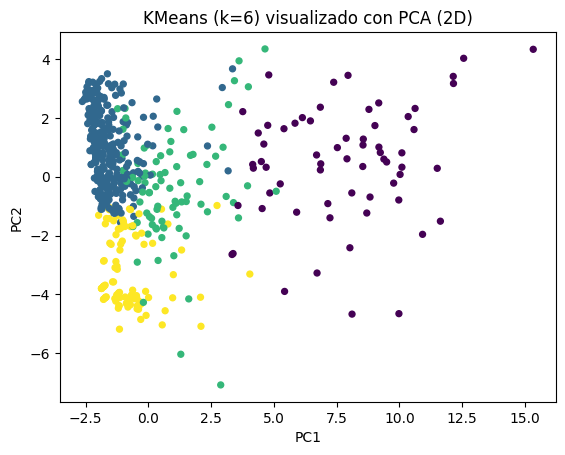

In [141]:
X_scaled = pipe.named_steps["standardscaler"].transform(data_modelo)
X_2d = PCA(n_components=4, random_state=42).fit_transform(X_scaled)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=18)
plt.title("KMeans (k=6) visualizado con PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

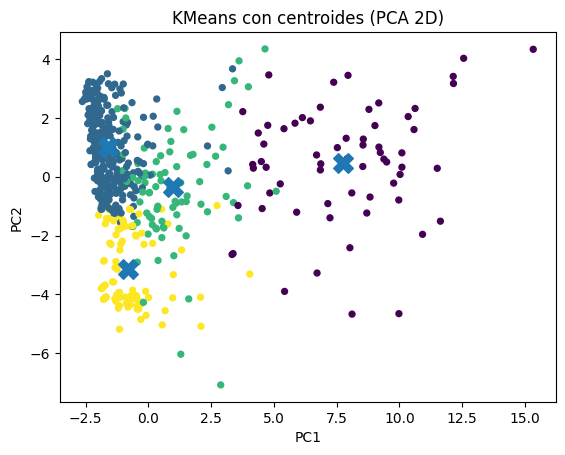

In [142]:
kmeans = pipe.named_steps["kmeans"]
centers_2d = PCA(n_components=2, random_state=42).fit(X_scaled).transform(kmeans.cluster_centers_)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=18)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker="X", s=200)
plt.title("KMeans con centroides (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [143]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(64), np.int32(1): np.int64(310), np.int32(2): np.int64(84), np.int32(3): np.int64(99)}


In [144]:
df_prediction = data_modelo.copy()
df_prediction["cluster"] = labels

In [145]:
sizes = df_prediction["cluster"].value_counts().sort_index()
print(sizes)


cluster
0     64
1    310
2     84
3     99
Name: count, dtype: int64


In [146]:
num_cols = df_prediction.select_dtypes(include="number").columns.drop("cluster")

means = df_prediction.groupby("cluster")[num_cols].mean()
medians = df_prediction.groupby("cluster")[num_cols].median()

display(means.head())     # en notebook
display(medians.head())


,Reintervención_Quirúrgica_hasta_1m_POP=NO,UCI_al_Momento_Tx=NO,Inmunosupresor_1_1mesPostTx=TACROLIMUS,Días_Nutrición_Enteral,Inmunosupresor_2_PostTx=Desconocido,Infección_Al_Momento_Tx=SI,infeccion_post_TX,Antibiotico_previo_al_Tx=SI,Inmunosupresor_1_Postx=Desconocido,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,...,Localización de la infección=10,Inmunosupresor_2_PostTx_1mesPx=Desconocido,Reintervención_Quirúrgica_hasta_1m_POP=SI,Inmunosupresor_2_PostTx_1mesPx=No,Talla,Días_En_UCI_Post_Tx,UCI_6_meses_Pre_Tx=SI,Inmunosupresor_1_1mesPostTx=Desconocido,Germen/Microorganismo aislado=Klebsiella pneumoniae ss. pneumoniae,Inmunosupresor_2_PostTx=No
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.125000,0.765625,0.187500,5.875000,0.203125,0.265625,0.062500,0.312500,0.203125,0.031250,...,0.046875,0.640625,0.828125,0.140625,66.218750,11.109375,0.359375,0.640625,0.031250,0.062500
1,0.741935,0.977419,0.251613,0.093548,0.000000,0.151613,0.983871,0.590323,0.000000,0.000000,...,0.003226,0.000000,0.258065,0.006452,109.838710,2.041935,0.116129,0.000000,0.000000,0.000000
2,0.321429,0.797619,0.464286,1.130952,0.000000,0.226190,0.154762,0.380952,0.000000,0.047619,...,0.023810,0.000000,0.678571,0.119048,71.190476,5.702381,0.238095,0.000000,0.023810,0.035714
3,0.565657,0.929293,0.959596,0.454545,0.000000,0.131313,0.939394,0.222222,0.000000,0.010101,...,0.020202,0.000000,0.424242,0.010101,3.747475,0.646465,0.252525,0.000000,0.010101,0.000000


,Reintervención_Quirúrgica_hasta_1m_POP=NO,UCI_al_Momento_Tx=NO,Inmunosupresor_1_1mesPostTx=TACROLIMUS,Días_Nutrición_Enteral,Inmunosupresor_2_PostTx=Desconocido,Infección_Al_Momento_Tx=SI,infeccion_post_TX,Antibiotico_previo_al_Tx=SI,Inmunosupresor_1_Postx=Desconocido,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,...,Localización de la infección=10,Inmunosupresor_2_PostTx_1mesPx=Desconocido,Reintervención_Quirúrgica_hasta_1m_POP=SI,Inmunosupresor_2_PostTx_1mesPx=No,Talla,Días_En_UCI_Post_Tx,UCI_6_meses_Pre_Tx=SI,Inmunosupresor_1_1mesPostTx=Desconocido,Germen/Microorganismo aislado=Klebsiella pneumoniae ss. pneumoniae,Inmunosupresor_2_PostTx=No
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,-1.0,6.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,157.0,2.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.0,3.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [147]:
global_mean = df_prediction[num_cols].mean()
global_std  = df_prediction[num_cols].std(ddof=0).replace(0, np.nan)

z = (means - global_mean) / global_std  # z-score de la media del cluster vs global

TOP = 10
for c in z.index:
    top_high = z.loc[c].sort_values(ascending=False).head(TOP)
    top_low  = z.loc[c].sort_values(ascending=True).head(TOP)

    print(f"\n=== Cluster {c} (n={sizes.loc[c]}) ===")
    print("↑ Variables más altas vs global (z):")
    print(top_high.round(2).to_string())
    print("↓ Variables más bajas vs global (z):")
    print(top_low.round(2).to_string())



=== Cluster 0 (n=64) ===
↑ Variables más altas vs global (z):
Inmunosupresor_1_1mesPostTx=Desconocido       2.17
Inmunosupresor_2_PostTx_1mesPx=Desconocido    2.17
Inmunosupresor_1_6mesesPostx=Desconocido      2.13
Inmunosupresor_2_6mesesPostTx=Desconocido     2.11
Trasfusión_GRE_hasta_1m_POP=SI                2.04
Requerimiento_de_diálisis=SI                  2.04
Inmunosupresor_2_PostTx=Desconocido           1.19
Inmunosupresor_1_Postx=Desconocido            1.19
Días_Nutrición_Enteral                        1.04
Días_En_UCI_Post_Tx                           0.98
↓ Variables más bajas vs global (z):
Inmunosupresor_2_PostTx_1mesPx=MICOFENOLATO   -2.11
Trasfusión_GRE_hasta_1m_POP=NO                -2.04
Requerimiento_de_diálisis=NO                  -2.04
infeccion_post_TX                             -1.57
Inmunosupresor_2_6mesesPostTx=MICOFENOLATO    -1.50
Inmunosupresor_2_PostTx=MICOFENOLATO          -1.20
Retrasplante=NO                               -1.04
Reintervención_Quirúrgica_

In [148]:
summary = means.copy()
summary.insert(0, "n", sizes)
display(summary)


,n,Reintervención_Quirúrgica_hasta_1m_POP=NO,UCI_al_Momento_Tx=NO,Inmunosupresor_1_1mesPostTx=TACROLIMUS,Días_Nutrición_Enteral,Inmunosupresor_2_PostTx=Desconocido,Infección_Al_Momento_Tx=SI,infeccion_post_TX,Antibiotico_previo_al_Tx=SI,Inmunosupresor_1_Postx=Desconocido,...,Localización de la infección=10,Inmunosupresor_2_PostTx_1mesPx=Desconocido,Reintervención_Quirúrgica_hasta_1m_POP=SI,Inmunosupresor_2_PostTx_1mesPx=No,Talla,Días_En_UCI_Post_Tx,UCI_6_meses_Pre_Tx=SI,Inmunosupresor_1_1mesPostTx=Desconocido,Germen/Microorganismo aislado=Klebsiella pneumoniae ss. pneumoniae,Inmunosupresor_2_PostTx=No
cluster,,,,,,,,,,,,,,,,,,,,,
0,64,0.125000,0.765625,0.187500,5.875000,0.203125,0.265625,0.062500,0.312500,0.203125,...,0.046875,0.640625,0.828125,0.140625,66.218750,11.109375,0.359375,0.640625,0.031250,0.062500
1,310,0.741935,0.977419,0.251613,0.093548,0.000000,0.151613,0.983871,0.590323,0.000000,...,0.003226,0.000000,0.258065,0.006452,109.838710,2.041935,0.116129,0.000000,0.000000,0.000000
2,84,0.321429,0.797619,0.464286,1.130952,0.000000,0.226190,0.154762,0.380952,0.000000,...,0.023810,0.000000,0.678571,0.119048,71.190476,5.702381,0.238095,0.000000,0.023810,0.035714
3,99,0.565657,0.929293,0.959596,0.454545,0.000000,0.131313,0.939394,0.222222,0.000000,...,0.020202,0.000000,0.424242,0.010101,3.747475,0.646465,0.252525,0.000000,0.010101,0.000000


#MODELO DE REGRESIÓN LOGÍSTICO

In [166]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score


def print_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"{name:15}  Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}")

In [167]:
data_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 57 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Reintervención_Quirúrgica_hasta_1m_POP=NO                           557 non-null    int64  
 1   UCI_al_Momento_Tx=NO                                                557 non-null    int64  
 2   Inmunosupresor_1_1mesPostTx=TACROLIMUS                              557 non-null    int64  
 3   Días_Nutrición_Enteral                                              557 non-null    int64  
 4   Inmunosupresor_2_PostTx=Desconocido                                 557 non-null    int64  
 5   Infección_Al_Momento_Tx=SI                                          557 non-null    int64  
 6   infeccion_post_TX                                                   557 non-null    int64  
 7   Antibiotico_previ

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#lista_nan=["Hipertensión_Arterial","IMC","Talla","Peso_previo_Cx","Child_Pugh_Score_Label","Child_Pugh_Score","Localización de la infección","Germen/Microorganismo aislado","Inmunosupresión_con_Anticuerpos","Localización de la infección","Tiempo_De_Dosis_Hasta_Tx#1","SOBREVIDA_DIAS", "SOBREVIDA_MESES", "SOBREVIDA_AÑOS"]
#df= sin.drop(columns=lista_nan, errors = "ignore")
df = data_modelo.copy()
target = "infeccion_post_TX"
y = df[target]
X = df.drop(columns=[target])

num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns  # incluye object/category; ojo con datetime

# si tienes datetime, mejor sacarlas de cat_cols o convertirlas antes a partes (hour, dow, etc.)
# cat_cols = cat_cols.drop(["mi_col_fecha"], errors="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols),
    ],
    remainder="drop"
)


param_grid= {
        "clf__solver": ["lbfgs"],
        "clf__penalty": ["l2"],
        "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "clf__class_weight": [None, "balanced"],
        "clf__max_iter": [2000],
    }


model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",      # suele ser mejor que accuracy si hay desbalance
    cv=5,
    n_jobs=-1,
    verbose=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() == 2 else None
)

test, val = train_test_split(X_test, test_size=0.5, random_state=seed)


grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Test score:", grid.score(X_test, y_test))
best_lr = grid.best_estimator_
model.fit(X_train, y_train)
print("score test:", model.score(X_test, y_test))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__C': 100, 'clf__class_weight': None, 'clf__max_iter': 2000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best CV score: 0.997752808988764
Test score: 0.9821428571428571
score test: 0.9821428571428571


Notamos que agregar el tiempo de sobrevida mejora el rendimiento del modelo; sin embargo, esto refiere a una posible fuga de datos.

## Distribución subconjuntos de datos

In [154]:
distribucion_train=X_train.describe().drop(index="count")
distribucion_test=X_test.describe().drop(index="count")

In [155]:
distribucion_train-distribucion_test

,Reintervención_Quirúrgica_hasta_1m_POP=NO,UCI_al_Momento_Tx=NO,Inmunosupresor_1_1mesPostTx=TACROLIMUS,Días_Nutrición_Enteral,Inmunosupresor_2_PostTx=Desconocido,Infección_Al_Momento_Tx=SI,Antibiotico_previo_al_Tx=SI,Inmunosupresor_1_Postx=Desconocido,Antibiótico_1__Tx#1=CEFTAZIDIMA AVIBACTAM,Etiología_#1=FHF,...,Localización de la infección=10,Inmunosupresor_2_PostTx_1mesPx=Desconocido,Reintervención_Quirúrgica_hasta_1m_POP=SI,Inmunosupresor_2_PostTx_1mesPx=No,Talla,Días_En_UCI_Post_Tx,UCI_6_meses_Pre_Tx=SI,Inmunosupresor_1_1mesPostTx=Desconocido,Germen/Microorganismo aislado=Klebsiella pneumoniae ss. pneumoniae,Inmunosupresor_2_PostTx=No
mean,0.073154,-0.002789,-0.033066,-0.373415,-0.004314,0.014567,0.041091,-0.004314,-0.017797,-0.008748,...,-0.004374,0.025080,-0.082143,-0.006441,0.915128,-1.559771,-0.045686,0.025080,0.000060,0.01573
std,-0.009726,0.003347,-0.007586,-0.500351,-0.013803,0.011717,0.002545,-0.013803,-0.067694,-0.024244,...,-0.017566,0.043315,-0.011477,-0.015547,-0.686782,-6.462196,-0.035727,0.043315,-0.000003,0.12457
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.00000
max,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,-19.000000,0.000000,0.000000,0.000000,1.00000


# Random Forest Regresion

In [173]:
# GridSearchCV seguro: n_splits limitado por tamaño de la clase minoritaria
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC

min_class_size = y_train.value_counts().min()
n_splits = min(5, min_class_size)
if n_splits < 2:
    n_splits = 2  # Asegura al menos 2 splits
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Random Forest
params_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 8, 12, None],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params_rf)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Mejor Random Forest: ", grid_rf.best_params_)

Mejor Random Forest:  {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [174]:
pred_rf_train   = best_rf.predict(X_train)
print_metrics("Random_Forest",y_train,pred_rf_train )

Random_Forest    Accuracy: 0.996  Precision: 0.994  Recall: 1.000


Calculamos métricas de los modelos

In [177]:
pred_lr_test  = best_lr.predict(X_test)
print_metrics('Regresión Logística', y_test, pred_lr_test)
pred_rf_test  = best_rf.predict(X_test)
print_metrics("Random_Forest",y_test,pred_rf_test)

Regresión Logística  Accuracy: 0.982  Precision: 0.976  Recall: 1.000
Random_Forest    Accuracy: 0.982  Precision: 0.976  Recall: 1.000


In [178]:
print("Test score:", grid_rf.score(X_test, y_test))


Test score: 0.9821428571428571
